<a href="https://colab.research.google.com/github/PM-Rocet/Economy_5/blob/main/%D0%AD%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC_%D0%94%D0%975.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В вашем распоряжении имеются помесячные данные (файл advert. xslx) за период с января 2001 по декабрь 2010 г. о расходах на рекламу и объемах продаж регионального подразделения транснациональной корпорации: $x_t$ — расходы фирмы на рекламу, $y_t$ — объем продаж фирмы.

(а) Осуществите для рассматриваемых переменных тест Грейнджера на причинно-следственную связь (используйте первый, второй и третий лаги для каждой из переменных). Интерпретируйте результаты теста.

Импортируем библиотеки и загружаем данные

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_excel('advert.xlsx')

# Просмотр первых строк
df.head()

,x,y
0,4,27.0
1,3,25.7
2,0,24.3
3,5,23.2
4,3,27.6


Визуализируем временные ряды

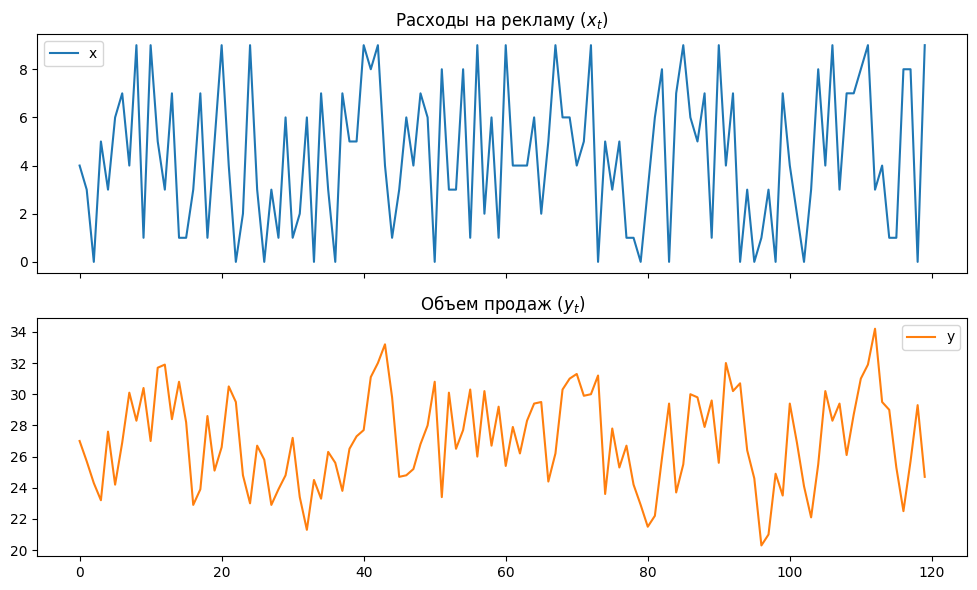

In [ ]:
df.plot(subplots=True, title=["Расходы на рекламу ($x_t$)", "Объем продаж ($y_t$)"], figsize=(10, 6))
plt.tight_layout()
plt.show()

Проверим на стационарность с помощью теста Дики-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic ({title}): {result[0]}')
    print(f'p-value: {result[1]}')

adf_test(df['x'], 'x_t')
adf_test(df['y'], 'y_t')

ADF Statistic (x_t): -11.92212308824074
p-value: 5.003836247044192e-22
ADF Statistic (y_t): -6.49725567509246
p-value: 1.1858056017298336e-08


p-value < 0.05, ряды стационарны

Теперь проведем тест Грейнджера для лагов 1, 2 и 3:

Тест Грейнджера на причинность — это статистический тест гипотезы, который позволяет определить, полезен ли один набор данных временных рядов для прогнозирования другого ряда.

В тесте Грейнджера последовательно проверяются две нулевые гипотезы:

«X не является причиной Y по Грейнджеру»

«Y не является причиной X по Грейнджеру»

In [ ]:
max_lag = 3
test_result = grangercausalitytests(df[['y', 'x']], maxlag=max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=518.5301, p=0.0000  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=531.9403, p=0.0000  , df=1
likelihood ratio test: chi2=202.2160, p=0.0000  , df=1
parameter F test:         F=518.5301, p=0.0000  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=253.2506, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=528.9127, p=0.0000  , df=2
likelihood ratio test: chi2=200.7801, p=0.0000  , df=2
parameter F test:         F=253.2506, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=166.9698, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=532.7856, p=0.0000  , df=3
likelihood ratio test: chi2=200.5928, p=0.0000  , df=3
parameter F test:         F=166.9698, p=0.0000  , df_denom=110, df_num=3


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Для каждого лага смотрим на значение p-value в блоке ssr F-test.

- p-value < 0.05, отвергаем нулевую гипотезу → есть причинно-следственная связь.

- Тест $y_t$ ~ $x_t$ проверяет, влияет ли $x_t$ на $y_t$ (расходы → продажи).

- Тест $x_t$ ~ $y_t$ — наоборот (продажи → расходы).

И наоборот — проверим, вызывает ли $y_t$ изменения в $x_t$

In [ ]:
test_result_reverse = grangercausalitytests(df[['x', 'y']], maxlag=max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6359  , p=0.4268  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=0.6524  , p=0.4193  , df=1
likelihood ratio test: chi2=0.6506  , p=0.4199  , df=1
parameter F test:         F=0.6359  , p=0.4268  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0040  , p=0.9960  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.0083  , p=0.9958  , df=2
likelihood ratio test: chi2=0.0083  , p=0.9958  , df=2
parameter F test:         F=0.0040  , p=0.9960  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3531  , p=0.7870  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.1266  , p=0.7707  , df=3
likelihood ratio test: chi2=1.1212  , p=0.7720  , df=3
parameter F test:         F=0.3531  , p=0.7870  , df_denom=110, df_num=3


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Для лагов 1, 2 и 3 значения p-value по всем тестам (ssr F, chi2, likelihood ratio, F test) значительно больше 0.05

Это означает, что нет статистически значимой причинной связи: продажи не вызывают изменение расходов на рекламу.

(б) Оцените регрессию $y_t$ на константу, $x_t , x_{t – 1} , x_{t – 2}$ . Дайте содержа тельную интерпретацию полученных результатов. Осуществите тест Дарбина—Уотсона и интерпретируйте его результаты. Можно ли использовать в представленной модели обычные стандартные ошибки или необходимо использовать состоятельные в условиях автокорреляции стандартные ошибки?

Регрессионная модель имеет вид:

$y_t = β_0 + β_1*x_t + \beta_2*x_{t-1} + β_3*x_{t-2} + ε_t$

Подготовим лаги

In [ ]:
import statsmodels.api as sm

# Создание лагов
df_lag = df.copy()
df_lag['xt_1'] = df_lag['x'].shift(1)
df_lag['xt_2'] = df_lag['x'].shift(2)

# Удаляем строки с NaN (из-за лагов)
df_lag = df_lag.dropna()

Построим модель OLS

In [ ]:
X = df_lag[['x', 'xt_1', 'xt_2']]
X = sm.add_constant(X)  # добавим константу
y = df_lag['y']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           6.37e-36
Time:                        09:44:37   Log-Likelihood:                -211.22
No. Observations:                 118   AIC:                             430.4
Df Residuals:                     114   BIC:                             441.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6889      0.387     55.991      0.0

Проведем тест Дарбина–Уотсона

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Статистика Дарбина-Уотсона: {dw_stat:.4f}")

Статистика Дарбина-Уотсона: 1.1167


DW < 1.5 → положительная автокорреляция

**Надо ли использовать устойчивые стандартные ошибки?**

Если тест Дарбина–Уотсона показывает наличие автокорреляции, то:

- стандартные ошибки OLS не надёжны (некорректные t-статистики),

- нужно использовать устойчивые (robust) стандартные ошибки

In [ ]:
robust_model = model.get_robustcov_results(cov_type='HAC', maxlags=2)
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.90e-40
Time:                        09:47:26   Log-Likelihood:                -211.22
No. Observations:                 118   AIC:                             430.4
Df Residuals:                     114   BIC:                             441.5
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6889      0.368     58.990      0.0

(в) Если в исходной модели были незначимые переменные, то оцените модель заново, исключив их. Осуществите тест Дарбина—Уотсона и интерпретируйте его результаты.

Так как у  $x_t$ p-value > 0.05, то это незначимая переменная

Новая модель:

$y_t = β_0 + \beta_1*x_{t-1} + β_2*x_{t-2} + ε_t$

In [ ]:
X_reduced = df_lag[['xt_1', 'xt_2']]
X_reduced = sm.add_constant(X_reduced)

model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

# Новый тест Дарбина-Уотсона
dw_stat_reduced = durbin_watson(model_reduced.resid)
print(f"\nDW для упрощённой модели: {dw_stat_reduced:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           4.20e-37
Time:                        09:57:18   Log-Likelihood:                -211.25
No. Observations:                 118   AIC:                             428.5
Df Residuals:                     115   BIC:                             436.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6406      0.328     65.939      0.0

R² = 0.767 → Модель объясняет 76.7% дисперсии объёма продаж — это хороший результат.

DW = 1.113
→ Это значительно меньше 2, что указывает на наличие положительной автокорреляции остатков.

In [ ]:
model_robust = model_reduced.get_robustcov_results(cov_type='HAC', maxlags=2)
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     227.5
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.07e-40
Time:                        10:01:51   Log-Likelihood:                -211.25
No. Observations:                 118   AIC:                             428.5
Df Residuals:                     115   BIC:                             436.8
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6406      0.282     76.682      0.0

(г) Оцените регрессию yt на константу, $x_t , x_{t – 1} , y_{t – 1}$ . Дайте содержа тельную интерпретацию полученных результатов. Почему в этой модели нельзя использовать тест Дарбина—Уотсона? Каким образом можно проверить, есть ли автокорреляция в новой модели?

Модель:

$y_t = β_0 + β_1*x_t + \beta_2*x_{t-1} + β_3*y_{t-1} + ε_t$

Оценим её

In [ ]:
# Добавим лаги
df['xt_1'] = df['x'].shift(1)
df['yt_1'] = df['y'].shift(1)

df_model = df.dropna()

X = df_model[['x', 'xt_1', 'yt_1']]
X = sm.add_constant(X)
y = df_model['y']

model_dyn = sm.OLS(y, X).fit()
print(model_dyn.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.23e-48
Time:                        10:05:54   Log-Likelihood:                -183.63
No. Observations:                 119   AIC:                             375.3
Df Residuals:                     115   BIC:                             386.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9294      0.990     10.035      0.0

x: мгновенное влияние расходов на рекламу.

$x_{t-1}$: эффект запаздывания рекламы на один месяц.

$y_{t-1}$: влияние прошлых продаж на текущие (автозависимость).

Если $y_{t-1}$ значим и положителен — продажи демонстрируют инерционность: высокий результат в прошлом месяце увеличивает текущие.

Почему нельзя использовать тест Дарбина–Уотсона:

Дарбин–Уотсон не применим, если в модели есть лаг зависимой переменной ($y_{t-1}$). Причина:

- $y_{t-1}$ по определению коррелирован с ошибками модели — нарушаются предпосылки DW-теста.

В этом случае DW занижен и не даёт надёжной информации.

Вместо теста Дарбина-Уотсона можно использовать тест Бреуша-Годфри (Breusch–Godfrey)

In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(model_dyn, nlags=2)
print(f"p-value BG теста: {bg_test[1]:.4f}")

p-value BG теста: 0.4588


p-value > 0.05, → остатки ведут себя нормально.

 (д) Сравните полученные в предыдущих пунктах модели и выберите наиболее удачную из них.

| **Формула**                                                                   | **R²**   | **DW**    | **Учет $y_{t-1}$** | **Автокорреляция в остатках** | **Вывод**                          |                                           
|-------------------------------------------------------------------------------|----------|-----------|---------------------|-------------------------------|------------------------------------|
| $y_t = \beta_0 + \beta_1 x_t + \beta_2 x_{t-1} + \beta_3 x_{t-2} + \varepsilon_t$       | 0.767    | 1.1167    | ❌                  | ✅ Есть                        | Простая, но с автокорреляцией     |
| $y_t = \beta_0 + \beta_1 x_{t-1} + \beta_2 x_{t-2} + \varepsilon_t$                    | 0.767   | 1.1125  | ❌                  | ✅ Есть                        | Похожа на первую, немного проще         |
| $y_t = \beta_0 + \beta_1 x_t + \beta_2 x_{t-1} + \beta_3 y_{t-1} + \varepsilon_t$      |  0.857  | —         | ✅                  | ❌ Нет     | Лучшая по объяснительной силе     |

